In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt

import pickle
import random
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split,KFold
from sklearn.metrics import *
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier,export_graphviz
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,RandomForestRegressor

The shape of the image is :  (80, 80, 3) 

The image is :


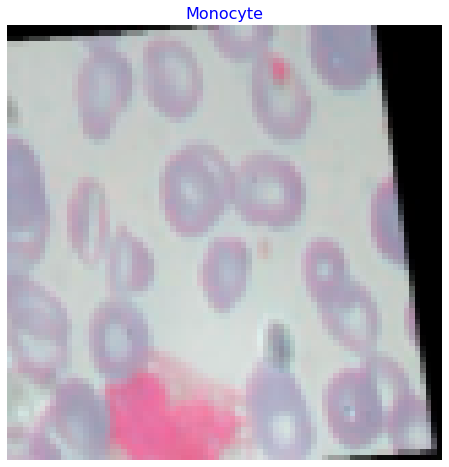

In [2]:
#Imports used for CNN
import os
from tqdm import tqdm
import numpy as np
import pandas as pd
from skimage import transform
from matplotlib import pyplot as plt
import cv2
import sys


#Reading the input image that will be taken for training
inp_image = transform.resize(cv2.imread(r"dataset2-master\images\TRAIN\MONOCYTE\_0_180.jpeg"), (80, 80, 3));

#Converting into an numpy array for further operations
inp_image = np.array(inp_image);

print("The shape of the image is : " , inp_image.shape , "\n")
print("The image is :")

fig = plt.subplots(1,figsize=(8,8));
plt.axis('off');
plt.title("Monocyte",
          fontsize = 16,
          color = 'blue');
plt.imshow(inp_image);

In [3]:
inp_image

array([[[0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        ...,
        [0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ]],

       [[0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        ...,
        [0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ]],

       [[0.04313725, 0.04705882, 0.04313725],
        [0.04313725, 0.04705882, 0.04313725],
        [0.04313725, 0.04705882, 0.04313725],
        ...,
        [0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ]],

       ...,

       [[0.7627451 , 0.79215686, 0.80588235],
        [0.75294118, 0.78823529, 0.78823529],
        [0.75882353, 0

In [ ]:
#Imports used for loading the data
import os
from tqdm import tqdm
import cv2
import numpy as np
np.set_printoptions(suppress=True)
from skimage import transform


def load_data(data):
    
    x = []
    y = []
    
    #To traverse every blood cell type folders in data 
    for bloodcell_type in os.listdir(data):
        if not bloodcell_type.startswith('.'):
        #In binary classification we have two classlabels 0 and 1 
        #If NEUTROPHIL and  EOSINOPHIL type cells found we just classify them as 1 and 
        #If MONOCYTE and  LYMPHOCYTE  type cells found we just classify them as 0 class label 
        
        #In multi class classification we will have 4 labels for respective classes.
            if bloodcell_type in ['NEUTROPHIL']:
                label = 0
            elif bloodcell_type in ['EOSINOPHIL']:
                label = 1
            elif bloodcell_type in ['MONOCYTE']:  
                label = 2
            elif bloodcell_type in ['LYMPHOCYTE']:
                label = 3
    
            #This loop is to traverse to every blood cell type in train data
            for filename in tqdm(os.listdir(data + '/' + bloodcell_type)):
                #To read every image in every folder
                image = cv2.imread(data +'/'+ bloodcell_type + '/' + filename)
                
                #If the image is found
                if image is not None:
                    #To resize the random sized images into a fixed size of 100x100x3
                    image = transform.resize(image, (80, 80, 3))
                    #Changing the datatype into array to process through the cnn algorithm
                    image_data_as_arr = np.asarray(image)
                    #Appending the data in the empty lists of X and y
                    x.append(image_data_as_arr)
                    y.append(label)
    x = np.asarray(x)
    y = np.asarray(y)
    
    return x,y

#Loading the train and test data for both binary and multi class
x_train, y_train = load_data(r'dataset2-master/images/TRAIN/')
x_test, y_test = load_data(r'dataset2-master/images/TEST/')
class_names = ['NEUTROPHIL', 'EOSINOPHIL', 'MONOCYTE', 'LYMPHOCYTE']

 26%|████████████████████▉                                                          | 661/2499 [00:11<00:33, 54.26it/s]

In [ ]:
x_train

In [ ]:
plt.imshow(x_train[0])

In [ ]:
y_train

In [8]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(9957, 80, 80, 3)
(9957,)
(2487, 80, 80, 3)
(2487,)


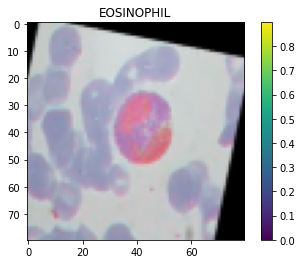

In [9]:
for i in range(1):
    n=y_train[i]
    name =class_names[n]
    plt.figure()
    plt.imshow(x_train[i])
    plt.colorbar()
    plt.grid(False)
    plt.title(name)
    plt.show()

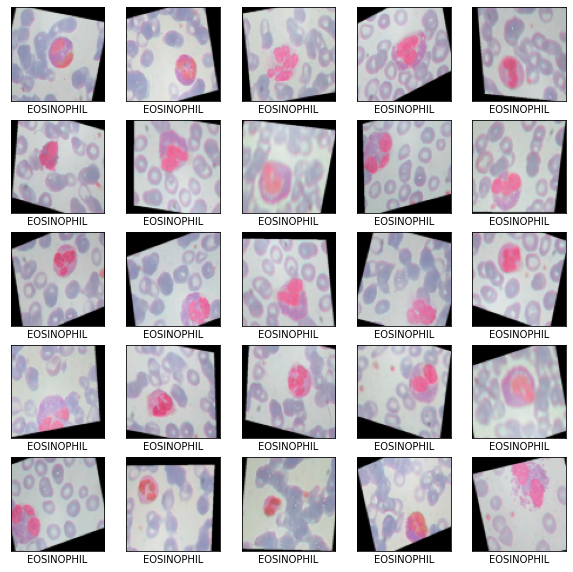

In [10]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    #plt.imshow(train_images[i])
    plt.xlabel(class_names[y_train[i]])
plt.show()

In [11]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'green'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(4), predictions_array, color="#777777")
  plt.ylim([0, 1]) 
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

In [12]:
def model_RandomForest(Xtrain,Ytrain,is_optimize=1):
    """
    训练随机森林
    """
    RandomForest = RandomForestClassifier()
    if is_optimize==1:
        param_grid_Log_RegRandomForest = [{"n_estimators":list(range(50,100,10)),"max_depth":list(range(3,10)),"min_samples_split":list(range(100,500,50))}]
        score = make_scorer(accuracy_score)
        param_grid = {"n_estimators":[500,800,1000],"max_depth":[8,9,10]}
        RandomForest = GridSearchCV(RandomForest,param_grid_Log_RegRandomForest,cv=3)
    RandomForest = RandomForest.fit(Xtrain, Ytrain)
    return RandomForest
def trainmodel_RF(x1_train,y_train):
    """
    目的：训练模型，随机森林
    x_train_stand：训练集输入，
    y_train：训练集标签，与输入相对应
    """
    #训练模型
    print("随机森林训练中")
    RandomForest = model_RandomForest(x1_train, y_train)

    with open("/model/RandomForestModel_sucess.pickle","wb") as pickle_file:
        pickle.dump(RandomForest,pickle_file)   #随机森林的拟合模型

    Str = "随机森林训练完成"
    return print(Str)

In [13]:
x1 = x_train.reshape(x_train.shape[0],x_train.shape[1]*x_train.shape[2]*x_train.shape[3])
x1.shape

(9957, 19200)

In [14]:
a = random.sample(range(9957), 9557)
for i in range(4000):
    x1[i] = x1[a[i]]
    y_train[i] = y_train[a[i]]
x1 = x1[0:4000]
y_train = y_train[0:4000]

In [15]:
y_train

array([0, 3, 3, ..., 1, 2, 0])

In [37]:
trainmodel_RF(x1,y_train)

随机森林训练中
随机森林训练完成


In [16]:
x2 = x_test.reshape(x_test.shape[0],x_test.shape[1]*x_test.shape[2]*x_test.shape[3])
x2.shape

(2487, 19200)

In [17]:
b = random.sample(range(2487), 2487)
for i in range(2487):
    x2[i] = x2[b[i]]
    y_test[i] = y_test[b[i]]

In [18]:
with open("/model/RandomForestModel_sucess.pickle","rb") as pickle_file:
    RandomForest = pickle.load(pickle_file)   #随机森林的拟合模型

In [19]:
print("训练集随机森林准确率: {:.3f}".format(accuracy_score(y_train,RandomForest.predict(x1))))

训练集随机森林准确率: 0.606


In [20]:
print("测试集随机森林准确率: {:.3f}".format(accuracy_score(y_test,RandomForest.predict(x2))))

测试集随机森林准确率: 0.556


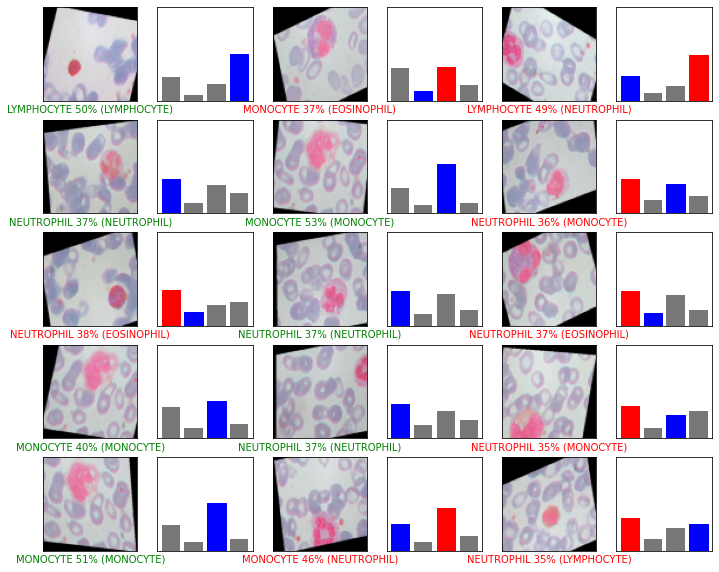

In [21]:
predictions_pro=RandomForest.predict_proba(x2)

# 可视化结果
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions_pro, y_test, x_test)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions_pro, y_test)
plt.show()